#**Project Summary:**
#**Football Transfer Market Analysis (2024/25)**
This project explores transfer patterns across 20 global leagues using data scraped from Transfermarkt. The focus is on market valuation, buying/selling efficiency, and player transfer dynamics — aligning with data-informed decision-making in football scouting and recruitment.

#Key Analyses Performed
**Data Cleaning & Preparation:**

Addressed missing values in dealing_club, loan_status, and dealing_country.

Standardized movement direction to define buying/selling clubs.

Filtered for paid, non-loan transfers to ensure consistent insights.

**Market Insights & Metrics:**

Value Gap Analysis: Compared fees vs. market values by position & league.

Club Efficiency Score: Measured profitability and smart-dealing clubs.

Radar Charts: Visualized normalized metrics (fee, value gap, age) across top leagues.

**Transfer Dynamics:**

Top 10 buying/selling clubs

Most profitable transfers

Age trend of IN vs OUT transfers by league

Transfer count, total fee, and average fee by position

**Advanced Visualizations:**

Heatmaps, bar plots, and radar charts to simplify club-level and league-wide comparisons.

Identified undervalued leagues (e.g., Liga Portugal), and high-demand roles (e.g., CF, CB).

#**Key Takeaways:**
Premier League clubs consistently overpay for attacking players, especially CF and SS.

Serie A and Liga Portugal offer better value and are ideal scouting territories.

Clubs that sign younger players and sell at peak value tend to rank highest on efficiency.

Positions like Centre Forward dominate spending

In [1]:
import numpy as np
import pandas as pd

In [2]:
transfers = pd.read_csv("yashwanth_task.csv")

In [3]:
transfers

,name,position,age,market_value,nationality,fee,dealing_club,dealing_country,movement,window,club,league,season,is_loan,loan_status,short_pos
0,Riccardo Calafiori,Left-Back,22,45000000.0,Italy,45000000.0,Bologna FC 1909,Italy,in,Summer,Arsenal FC,Premier League,2024-2025,False,NaN,LB
1,Mikel Merino,Central Midfield,28,50000000.0,Spain,32000000.0,Real Sociedad,Spain,in,Summer,Arsenal FC,Premier League,2024-2025,False,NaN,CM
2,David Raya,Goalkeeper,28,35000000.0,Spain,31900000.0,Brentford FC,England,in,Summer,Arsenal FC,Premier League,2024-2025,False,NaN,GK
3,Raheem Sterling,Right Winger,29,35000000.0,England,0.0,Chelsea FC,England,in,Summer,Arsenal FC,Premier League,2024-2025,True,free loan,RW
4,Neto,Goalkeeper,35,2500000.0,Brazil,0.0,AFC Bournemouth,England,in,Summer,Arsenal FC,Premier League,2024-2025,True,free loan,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15013,Rajiv van La Parra,Left Winger,33,250000.0,Netherlands,0.0,Without Club,NaN,in,Winter,Beerschot VA,Jupiler Pro League,2024-2025,False,NaN,LW
15014,Charly Keita,Centre-Forward,25,500000.0,France,300000.0,Amed SK,Türkiye,out,Winter,Beerschot VA,Jupiler Pro League,2024-2025,False,NaN,CF
15015,Hervé Matthys,Centre-Back,29,750000.0,Belgium,100000.0,Motor Lublin,Poland,out,Winter,Beerschot VA,Jupiler Pro League,2024-2025,False,NaN,CB
15016,Thibaud Verlinden,Left Winger,25,1700000.0,Belgium,0.0,Oud-Heverlee Leuven,Belgium,out,Winter,Beerschot VA,Jupiler Pro League,2024-2025,False,NaN,LW


In [ ]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15018 entries, 0 to 15017
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15018 non-null  object 
 1   position         15018 non-null  object 
 2   age              15018 non-null  object 
 3   market_value     15018 non-null  float64
 4   nationality      15018 non-null  object 
 5   fee              15018 non-null  float64
 6   dealing_club     14911 non-null  object 
 7   dealing_country  14307 non-null  object 
 8   movement         15018 non-null  object 
 9   window           15018 non-null  object 
 10  club             15018 non-null  object 
 11  league           15018 non-null  object 
 12  season           15018 non-null  object 
 13  is_loan          15018 non-null  bool   
 14  loan_status      7033 non-null   object 
 15  short_pos        15018 non-null  object 
dtypes: bool(1), float64(2), object(13)
memory usage: 1.7+ MB


# Problems with DataFrame
* dealing_club,dealing_country,loan_status is having some null values

# dealing_club
There were 105 players with movement = "out" but no dealing club.



In [4]:
transfers["dealing_club"]# here the some players are

,dealing_club
0,Bologna FC 1909
1,Real Sociedad
2,Brentford FC
3,Chelsea FC
4,AFC Bournemouth
...,...
15013,Without Club
15014,Amed SK
15015,Motor Lublin
15016,Oud-Heverlee Leuven


In [5]:
# Identify outgoing transfers without a dealing club
out_transfers_missing_dealing_club = transfers[(transfers['movement'] == 'out') & (transfers['dealing_club'].isnull())]

In [6]:
out_transfers_missing_dealing_club

,name,position,age,market_value,nationality,fee,dealing_club,dealing_country,movement,window,club,league,season,is_loan,loan_status,short_pos
527,Felipe,Centre-Back,35,1500000.0,Brazil,0.0,NaN,NaN,out,Summer,Nottingham Forest,Premier League,2024-2025,False,NaN,CB
613,Darren Randolph,Goalkeeper,37,300000.0,Ireland,0.0,NaN,NaN,out,Summer,AFC Bournemouth,Premier League,2024-2025,False,NaN,GK
694,Marc Albrighton,Right Midfield,34,400000.0,England,0.0,NaN,NaN,out,Summer,Leicester City,Premier League,2024-2025,False,NaN,RM
734,Sone Aluko,Right Winger,35,150000.0,Nigeria,0.0,NaN,NaN,out,Summer,Ipswich Town,Premier League,2024-2025,False,NaN,RW
758,Toni Kroos,Central Midfield,34,10000000.0,Germany,0.0,NaN,NaN,out,Summer,Real Madrid,LaLiga,2024-2025,False,NaN,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,Simone Grippo,Centre-Back,35,100000.0,Switzerland,0.0,NaN,NaN,out,Summer,FC Lausanne-Sport,Super League,2024-2025,False,NaN,CB
14631,Ritchie De Laet,Right-Back,35,300000.0,Belgium,0.0,NaN,NaN,out,Summer,Royal Antwerp FC,Jupiler Pro League,2024-2025,False,NaN,RB
14796,Shinji Okazaki,Centre-Forward,38,150000.0,Japan,0.0,NaN,NaN,out,Summer,Sint-Truidense VV,Jupiler Pro League,2024-2025,False,NaN,CF
14887,Jules Van Cleemput,Right-Back,27,600000.0,Belgium,0.0,NaN,NaN,out,Winter,KV Mechelen,Jupiler Pro League,2024-2025,False,NaN,RB


In [7]:


# Count how many such cases exist
missing_count = out_transfers_missing_dealing_club.shape[0]

# Fill missing dealing clubs for 'out' movements with 'No Club'
transfers.loc[(transfers['movement'] == 'out') & (transfers['dealing_club'].isnull()), 'dealing_club'] = 'Without Club'

# Confirm changes
updated_missing = transfers[(transfers['movement'] == 'out') & (transfers['dealing_club'].isnull())].shape[0]

missing_count, updated_missing


(105, 0)

# loan_status

In [8]:
# Fill loan_status with "Permanent Transfer or Release" for OUT movements with no dealing club
transfers.loc[(transfers['movement'] == 'out') & (transfers['dealing_club'] == 'Without Club') & (transfers['loan_status'].isnull()), 'loan_status'] = 'Permanent Transfer or Release'


In [ ]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15018 entries, 0 to 15017
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15018 non-null  object 
 1   position         15018 non-null  object 
 2   age              15018 non-null  object 
 3   market_value     15018 non-null  float64
 4   nationality      15018 non-null  object 
 5   fee              15018 non-null  float64
 6   dealing_club     15016 non-null  object 
 7   dealing_country  14307 non-null  object 
 8   movement         15018 non-null  object 
 9   window           15018 non-null  object 
 10  club             15018 non-null  object 
 11  league           15018 non-null  object 
 12  season           15018 non-null  object 
 13  is_loan          15018 non-null  bool   
 14  loan_status      7138 non-null   object 
 15  short_pos        15018 non-null  object 
dtypes: bool(1), float64(2), object(13)
memory usage: 1.7+ MB


In [12]:
transfers['dealing_club'].isnull().sum()

np.int64(2)

In [13]:

# 3. Fill missing dealing_country with "Unknown"
transfers['dealing_club'] = transfers['dealing_club'].fillna('Without Club')


# Loan_status

Because they were not loaned, and not free agents — they were bought/sold permanently.

In [9]:
# 2. Non-loans with missing loan_status = Permanent Transfer
transfers.loc[
    (transfers['is_loan'] == False) &
    (transfers['loan_status'].isnull()),
    'loan_status'
] = 'Permanent Transfer'

In [ ]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15018 entries, 0 to 15017
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15018 non-null  object 
 1   position         15018 non-null  object 
 2   age              15018 non-null  object 
 3   market_value     15018 non-null  float64
 4   nationality      15018 non-null  object 
 5   fee              15018 non-null  float64
 6   dealing_club     15016 non-null  object 
 7   dealing_country  14307 non-null  object 
 8   movement         15018 non-null  object 
 9   window           15018 non-null  object 
 10  club             15018 non-null  object 
 11  league           15018 non-null  object 
 12  season           15018 non-null  object 
 13  is_loan          15018 non-null  bool   
 14  loan_status      15018 non-null  object 
 15  short_pos        15018 non-null  object 
dtypes: bool(1), float64(2), object(13)
memory usage: 1.7+ MB


# dealing_country

In [10]:

# 3. Fill missing dealing_country with "Unknown"
transfers['dealing_country'] = transfers['dealing_country'].fillna('Unknown')


In [14]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15018 entries, 0 to 15017
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15018 non-null  object 
 1   position         15018 non-null  object 
 2   age              15018 non-null  object 
 3   market_value     15018 non-null  float64
 4   nationality      15018 non-null  object 
 5   fee              15018 non-null  float64
 6   dealing_club     15018 non-null  object 
 7   dealing_country  15018 non-null  object 
 8   movement         15018 non-null  object 
 9   window           15018 non-null  object 
 10  club             15018 non-null  object 
 11  league           15018 non-null  object 
 12  season           15018 non-null  object 
 13  is_loan          15018 non-null  bool   
 14  loan_status      15018 non-null  object 
 15  short_pos        15018 non-null  object 
dtypes: bool(1), float64(2), object(13)
memory usage: 1.7+ MB


In [15]:
transfers.to_csv("transfers.csv")

In [2]:
import numpy as np
import pandas as pd


In [3]:
transfers = pd.read_csv("transfers.csv")

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#**Positional Transfer Market Insights:**
* Total Transfer Fees by Position

→ Shows where clubs are spending the most overall
here., Strikers (CF) and Center-Backs (CB) may dominate

* Average Fee by Position

→ Reveals premium roles (high fee per player) — not just volume
here., Wingers or Playmakers might fetch higher individual fees

* Number of Transfers by Position

→ Highlights high-mobility roles (most player movement)
here., Fullbacks or midfielders could show squad rotation trends

#**Total Transfer Fees by Position**
Centre Forwards (CF) commanded the highest total transfer spend, followed by Centre Backs (CB) and Central Midfielders (CM).

Fullbacks (RB, LB), Goalkeepers (GK), and wide midfielders (RM, LM) received much lower investment.

In [13]:
paid_transfers = transfers[(transfers['fee'] > 0) & (transfers['is_loan'] == False)]


<ipython-input-14-8651e9bb869f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_fees.sort_values('Total Fee', ascending=False), x='Position', y='Total Fee', palette='magma')


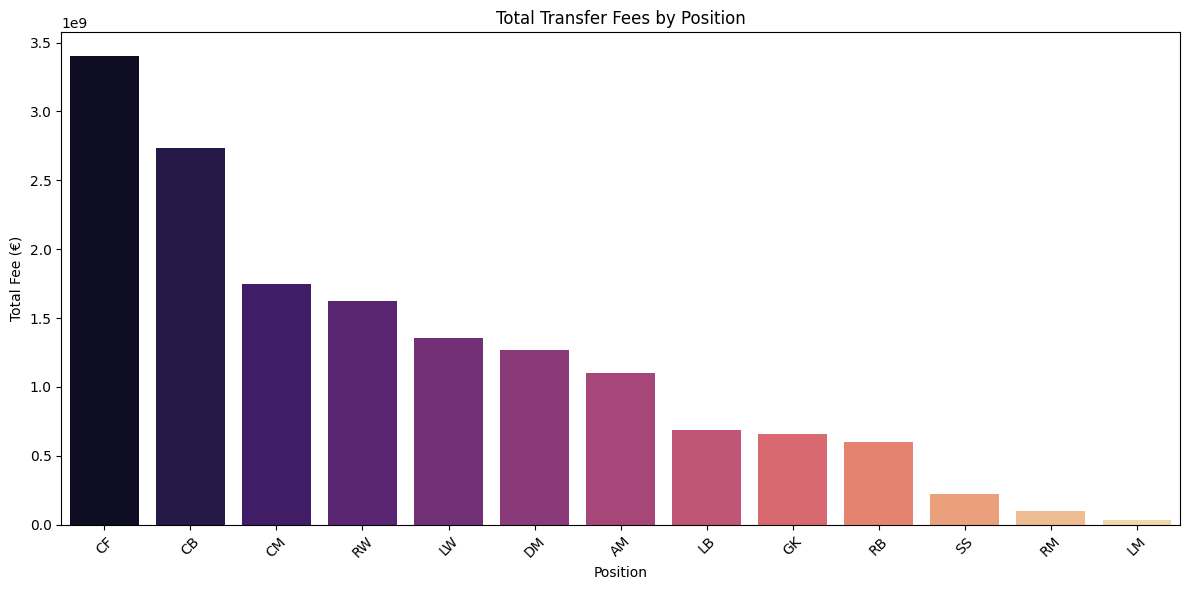

In [14]:
# Total and average transfer fee by position
position_fees = paid_transfers.groupby('short_pos').agg({
    'fee': ['sum', 'mean', 'count']
}).reset_index()

# Rename columns for clarity
position_fees.columns = ['Position', 'Total Fee', 'Average Fee', 'Transfer Count']

# Plot 1: Total Transfer Fees by Position
plt.figure(figsize=(12, 6))
sns.barplot(data=position_fees.sort_values('Total Fee', ascending=False), x='Position', y='Total Fee', palette='magma')
plt.title('Total Transfer Fees by Position')
plt.ylabel('Total Fee (€)')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**Average Transfer Fee by Position**
Second Strikers (SS) top the chart in average cost per player — despite a lower total volume.

CF, RW, AM also carry a higher per-player price tag.

<ipython-input-15-3a797466585f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_fees.sort_values('Average Fee', ascending=False), x='Position', y='Average Fee', palette='viridis')


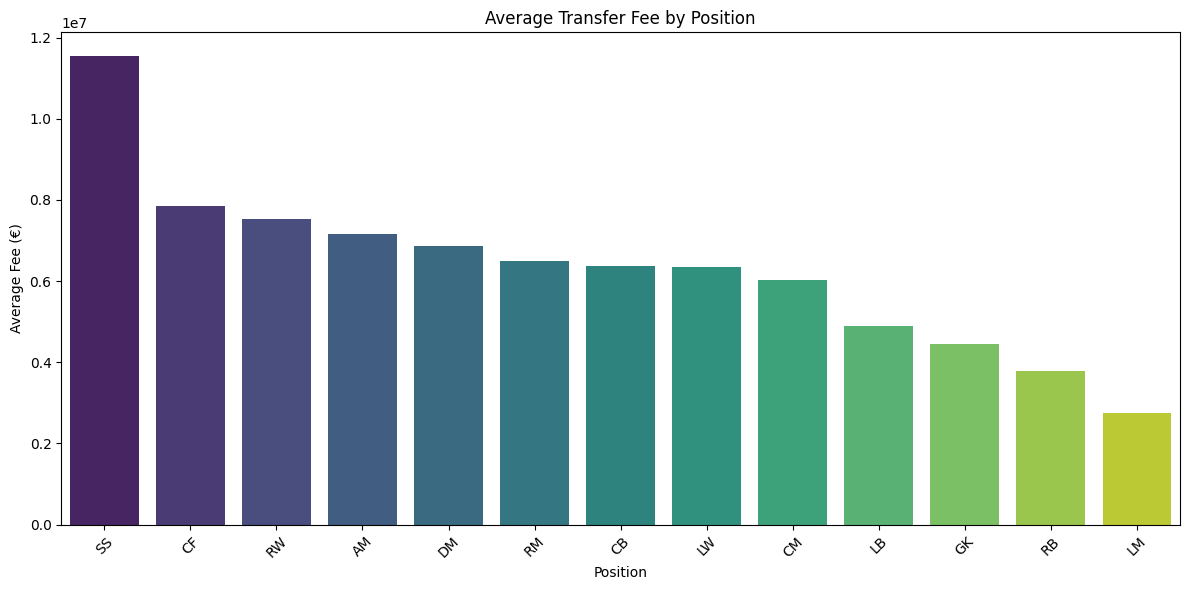

In [15]:

# Plot 2: Average Transfer Fee by Position
plt.figure(figsize=(12, 6))
sns.barplot(data=position_fees.sort_values('Average Fee', ascending=False), x='Position', y='Average Fee', palette='viridis')
plt.title('Average Transfer Fee by Position')
plt.ylabel('Average Fee (€)')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**Number of Transfers by Position**

Centre Forwards (CF) and Centre Backs (CB) are the most frequently transferred players.

Midfield roles (CM, DM, RW) also show high turnover.

Very few transfers occurred for SS, RM, and LM.

<ipython-input-16-dfa42b0d575c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_fees.sort_values('Transfer Count', ascending=False), x='Position', y='Transfer Count', palette='crest')


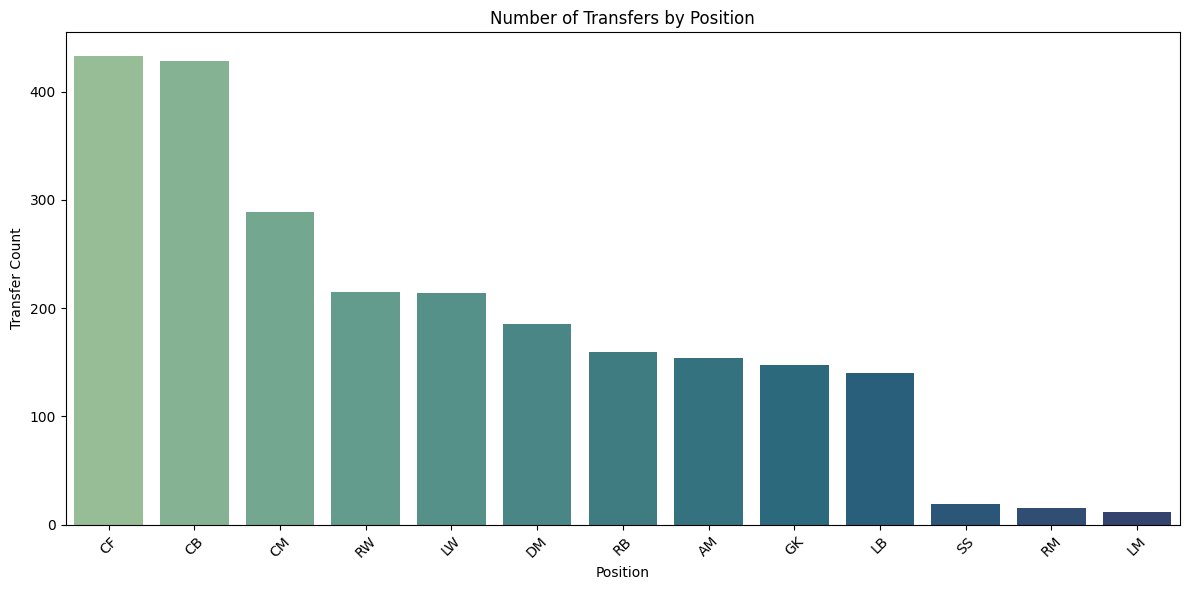

In [16]:

# Plot 3: Transfer Count by Position
plt.figure(figsize=(12, 6))
sns.barplot(data=position_fees.sort_values('Transfer Count', ascending=False), x='Position', y='Transfer Count', palette='crest')
plt.title('Number of Transfers by Position')
plt.ylabel('Transfer Count')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:

# Convert relevant columns
transfers['fee'] = pd.to_numeric(transfers['fee'], errors='coerce')
transfers['market_value'] = pd.to_numeric(transfers['market_value'], errors='coerce')
transfers['age'] = pd.to_numeric(transfers['age'], errors='coerce')

# Filter valid, paid, non-loan transfers
paid_transfers = transfers[(transfers['fee'] > 0) & (transfers['is_loan'] == False)]
paid_transfers['value_gap'] = paid_transfers['market_value'] - paid_transfers['fee']

# Club Efficiency Score
buying = paid_transfers[paid_transfers['movement'] == 'in']
selling = paid_transfers[paid_transfers['movement'] == 'out']
efficiency = pd.DataFrame()
efficiency['revenue'] = selling.groupby('club')['fee'].sum()
efficiency['spending'] = buying.groupby('club')['fee'].sum()
efficiency['transfers'] = paid_transfers.groupby('club').size()
efficiency['efficiency_score'] = (efficiency['revenue'] - efficiency['spending']) / efficiency['transfers']
efficiency = efficiency.dropna().sort_values('efficiency_score', ascending=False).head(10)



<ipython-input-11-b3a8c4edd4a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_transfers['value_gap'] = paid_transfers['market_value'] - paid_transfers['fee']


In [12]:
efficiency

,revenue,spending,transfers,efficiency_score
club,,,,
Valencia CF,30000000.0,1200000.0,2,1.440000e+07
FC Porto,160000000.0,46740000.0,11,1.029636e+07
LOSC Lille,62000000.0,23000000.0,4,9.750000e+06
SL Benfica,160920000.0,72000000.0,14,6.351429e+06
FC Toulouse,55300000.0,7500000.0,8,5.975000e+06
Everton FC,83150000.0,48200000.0,6,5.825000e+06
FC Nordsjaelland,57800000.0,1750000.0,12,4.670833e+06
RC Lens,95690000.0,20900000.0,17,4.399412e+06
Bologna FC 1909,102550000.0,49880000.0,12,4.389167e+06


#**Top 10 Most Profitable Transfers**

These players generated the highest profit margin for their selling clubs:

Nico González

Jhon Durán

A. Khusanov

Elliot Anderson

Dominic Solanke

Viktor Gyökeres

Gabriel Vidović

Manu Koné

Rayan Cherki

Elye Wahi



<ipython-input-17-37ace97887ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selling['profit'] = selling['fee'] - selling['market_value']
<ipython-input-17-37ace97887ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profits, x='name', y='profit', palette='viridis')


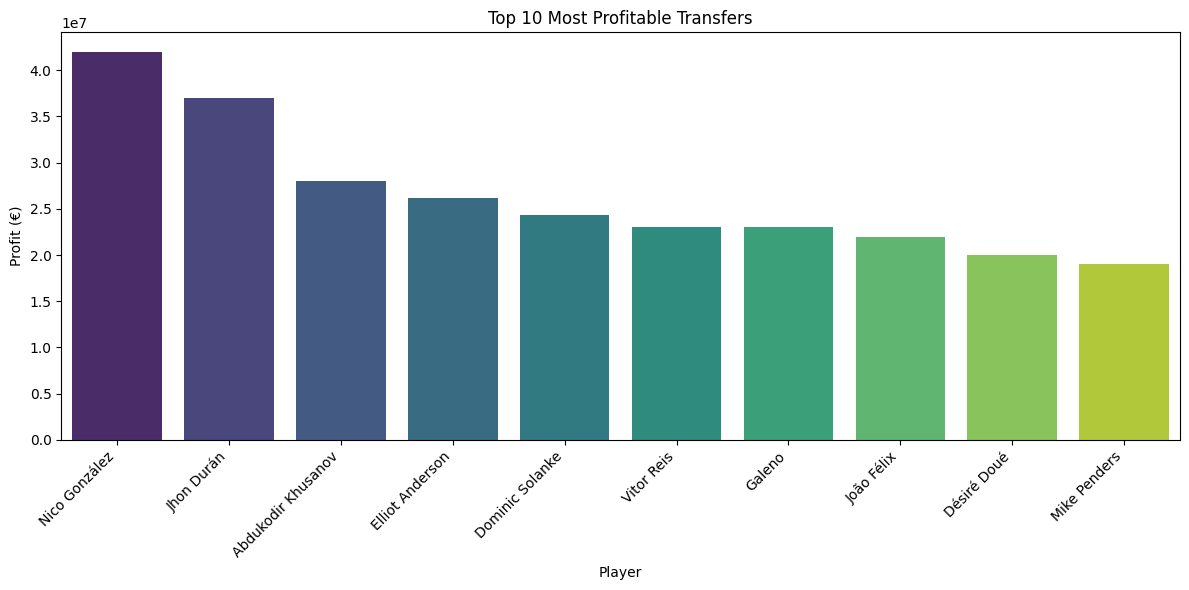

In [17]:
# Most Profitable Transfers
selling = paid_transfers[paid_transfers['movement'] == 'out']
selling['profit'] = selling['fee'] - selling['market_value']
top_profits = selling.sort_values('profit', ascending=False).head(10)

# Plot: Most Profitable Transfers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_profits, x='name', y='profit', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Profitable Transfers')
plt.ylabel('Profit (€)')
plt.xlabel('Player')
plt.tight_layout()
plt.show()


#**Top 10 Buying Clubs by Total Spending**
These clubs spent the most money in the 2024/25 window:

Brighton & Hove Albion

Chelsea FC

Manchester United

Manchester City

Paris Saint-Germain

Aston Villa

Atlético de Madrid

Tottenham Hotspur

Juventus FC

Ipswich Town

<ipython-input-18-b8df01cf3736>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_buying.index, y=top_buying.values, palette='coolwarm')


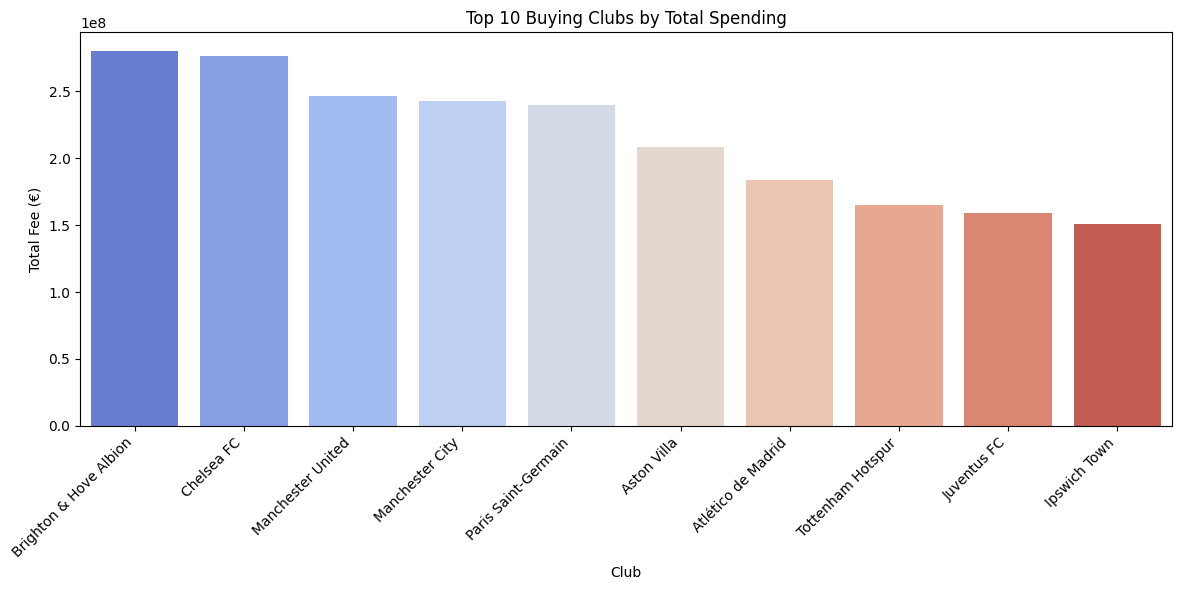

In [18]:
# Top Buying Clubs by Total Fee
top_buying = buying.groupby('club')['fee'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_buying.index, y=top_buying.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Buying Clubs by Total Spending')
plt.ylabel('Total Fee (€)')
plt.xlabel('Club')
plt.tight_layout()
plt.show()

#**Top 10 Selling Clubs by Total Revenue**
These clubs earned the most transfer revenue:

Aston Villa

Chelsea FC

Stade Rennais FC

SL Benfica

FC Porto

Manchester City

Sociedade Esportiva Palmeiras

Paris Saint-Germain

Eintracht Frankfurt

Wolverhampton Wanderers

<ipython-input-19-c45bf51c130c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling.index, y=top_selling.values, palette='crest')


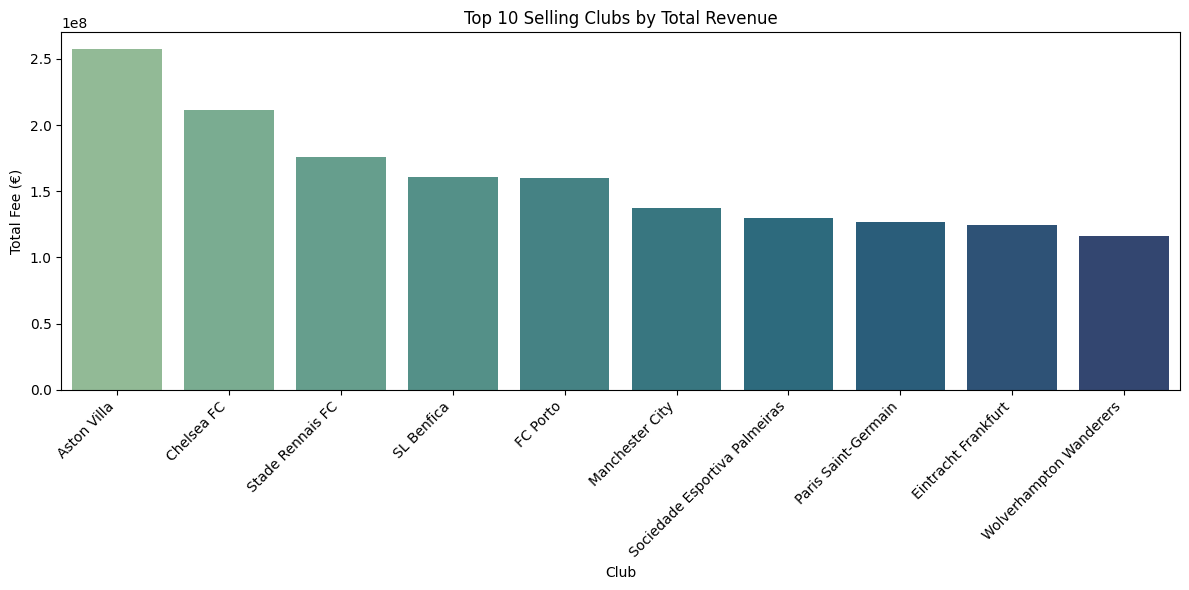

In [19]:

# Top Selling Clubs by Total Fee
top_selling = selling.groupby('club')['fee'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling.index, y=top_selling.values, palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Selling Clubs by Total Revenue')
plt.ylabel('Total Fee (€)')
plt.xlabel('Club')
plt.tight_layout()
plt.show()


#**Average Value Gap by Position across Top 2 Leagues**

Value Gap = Market Value − Transfer Fee

Positive gap → Good value buys

Negative gap → Overpaid players (premium)


🟦 **Premier League:**
Significantly overpaid for:

SS (Second Striker) → largest negative gap

AM (Attacking Midfielder), CB, and CF also show strong negative gaps

Clubs are consistently paying above market value for multiple key roles

🟧 **Serie A:**
Shows better value overall:

Positive or near-zero value gap for many positions

Notably RB, LB, RW had decent value in this league

Only slight overpayment in CB and DM, much lower than the Premier League

<ipython-input-25-b962c884516e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_transfers['value_gap'] = paid_transfers['market_value'] - paid_transfers['fee']


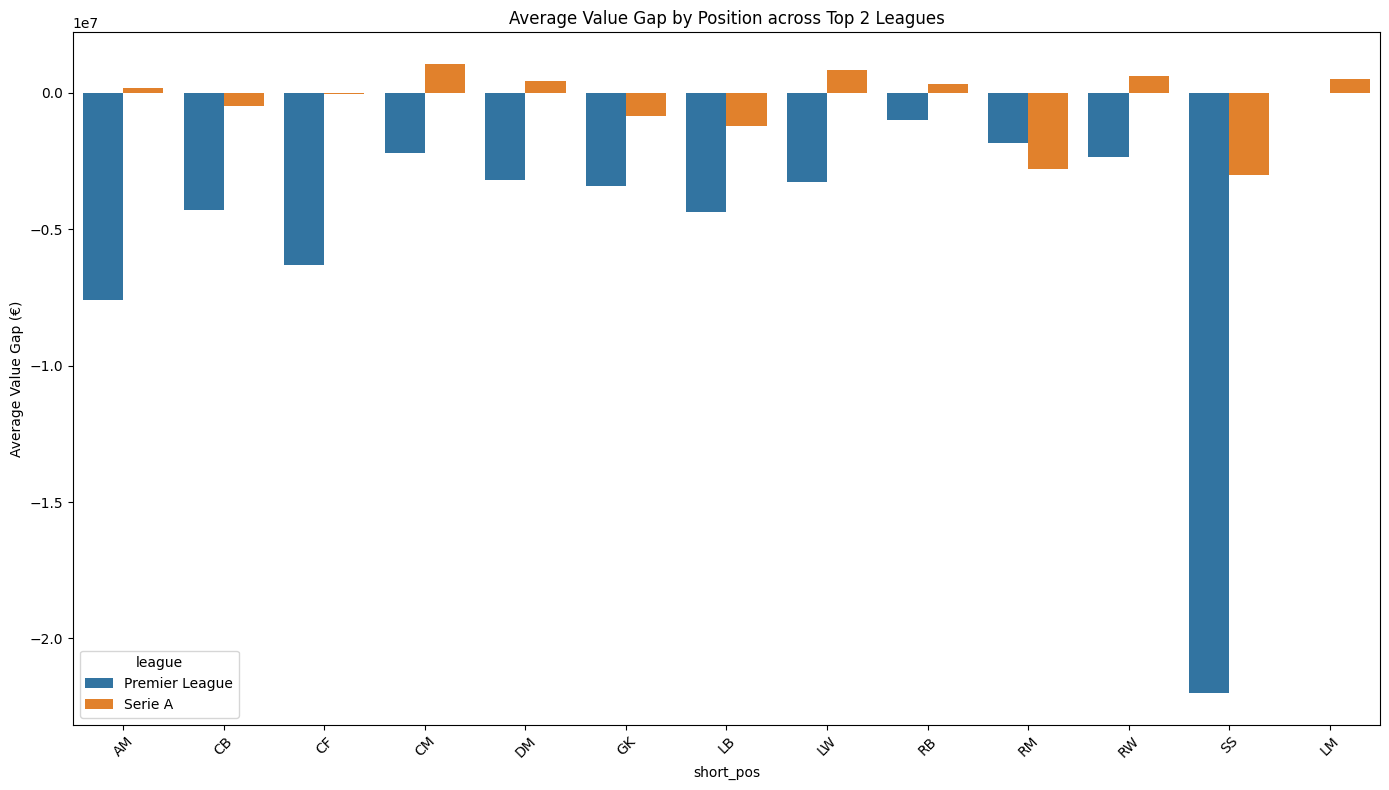

In [25]:
paid_transfers['value_gap'] = paid_transfers['market_value'] - paid_transfers['fee']

# Value Gap by League and Position
league_pos_gap = paid_transfers.groupby(['league', 'short_pos'])['value_gap'].mean().reset_index()
top_leagues = ['Premier League', 'Serie A']
filtered_gap = league_pos_gap[league_pos_gap['league'].isin(top_leagues)]

plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_gap, x='short_pos', y='value_gap', hue='league')
plt.title('Average Value Gap by Position across Top 2 Leagues')
plt.xticks(rotation=45)
plt.ylabel('Average Value Gap (€)')
plt.tight_layout()
plt.show()


#**Radar Chart: League Comparison**

Compared Premier League, Serie A, and Liga Portugal

Metrics: Avg Fee, Value Gap, Age

**Premier League:**
Highest spending (fee = 1.0)

But lowest value_gap → suggests consistent overpaying

Youngest players signed on average

Interpretation: High budget, aggressive early recruitment, but at a cost premium.

**Serie A:**
Balanced approach

Mid-level spending, strong positive value_gap (best value for money)

Recruits slightly older players on average

Interpretation: Efficient market behavior, better scouting and negotiation strategy.

**Liga Portugal:**
Lowest spending, but decent value_gap

Tends to transfer in mid-aged players

Interpretation: Strong at identifying undervalued assets despite budget constraints — classic “buy low, develop, sell high” league.

#**Average Age Trends (IN vs OUT) by League**

Spot which leagues develop vs offload players based on age

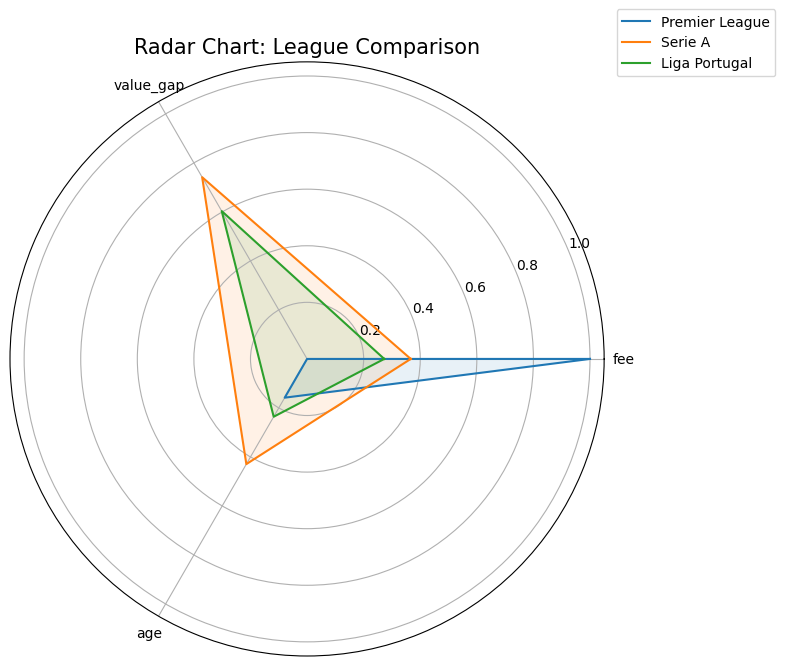

In [23]:
# Radar Chart: Compare 3 leagues on fee, value_gap, and age
radar_df = paid_transfers.groupby('league').agg({
    'fee': 'mean',
    'value_gap': 'mean',
    'age': 'mean'
}).reset_index().set_index('league')

# Normalize for radar chart comparison
radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())
selected_leagues = radar_norm.loc[['Premier League', 'Serie A', 'Liga Portugal']]

# Radar chart setup
labels = selected_leagues.columns.tolist()
num_vars = len(labels)

# Set up angles and layout
angles = [n / float(num_vars) * 2 * 3.14159 for n in range(num_vars)]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for index, row in selected_leagues.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)

ax.set_title("Radar Chart: League Comparison", size=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


#**Average Age Trends (IN vs OUT) by League**
**Consistent Trend Across Leagues:**
In almost every league, the average age of outgoing players is higher than that of incoming players.

This implies that:

Younger players are being signed

Older players are being sold or released



<Figure size 1400x600 with 0 Axes>

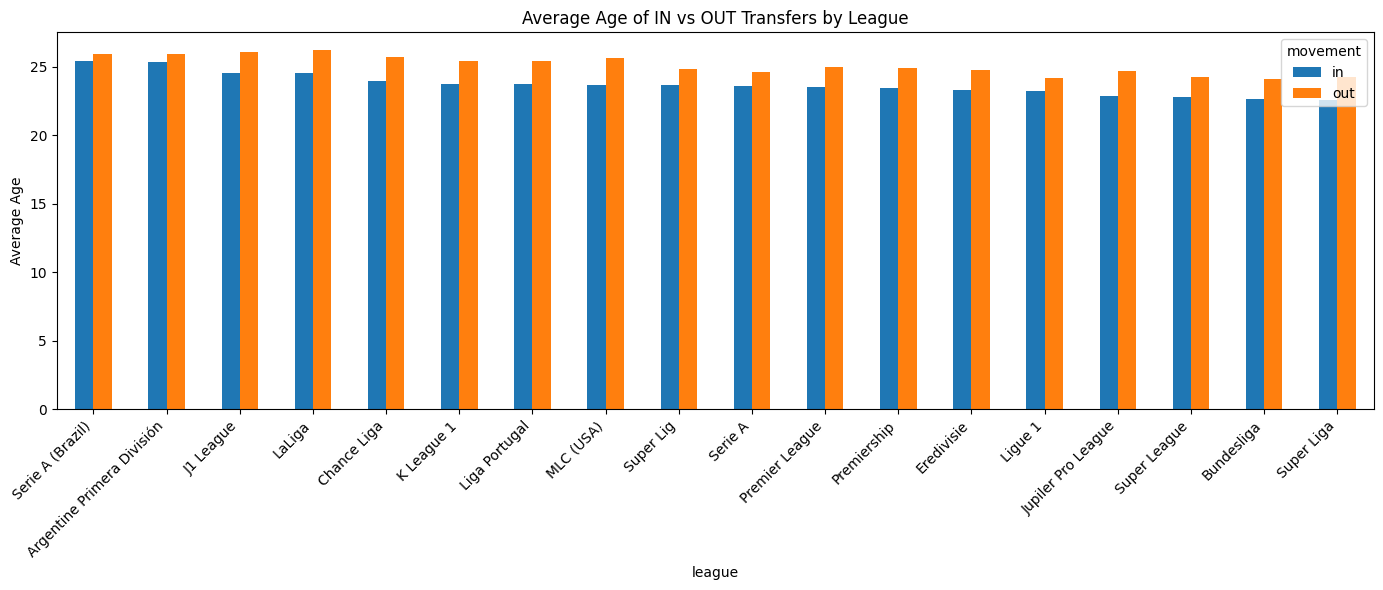

In [24]:

# Average Age Trends (In vs Out)
age_trend = transfers[transfers['age'].notnull()].groupby(['league', 'movement'])['age'].mean().unstack()

# Plot Average Age Trends
plt.figure(figsize=(14, 6))
age_trend.sort_values('in', ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title('Average Age of IN vs OUT Transfers by League')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
